In [1]:
import pandas as pd
from lifelines import CoxPHFitter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("C:/Users/jvgat/Downloads/Hazard/df_after_feature_engineering.csv")

# Ensure your date columns are datetime
date_cols = ['published_date','kev_published']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', utc=True)


# Example: calculate time-to-event in days
# Assuming 'exploit_date' exists; if not, you need an event time column
df['time_to_exploit'] = (df['kev_published'] - df['published_date']).dt.days

# Create event column: 1 if exploited, 0 if not
df['event'] = df['kev_published'].notna().astype(int)



C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\1365784635.py:2: DtypeWarning: Columns (34,35,36,37,39,40,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/jvgat/Downloads/Hazard/df_after_feature_engineering.csv")


## Baseline Model

c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 584 total observations, 0 right-censored observations>
             duration col = 'time_to_exploit'
                event col = 'event'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 584
number of events observed = 584
   partial log-likelihood = -3873.45
         time fit was run = 2025-11-06 20:29:25 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
base_score               0.06      1.06      0.03            0.00            0.12                1.00                1.12
repo_publication_lag    -0.01      0.99      0.08           -0.17            0.16                0.85                1.17
cross_listing_count    296.35 5.06e+128     10.00          276.75          315.95           1.56e+120           1.64e+137
cross_listing_variance   0.02      1.02      0.08           -0.15            0.18                0.86                1.19
cwe_risk_factor          0.57      1.77      0.66           -0.73            1.87                0.48                6.49

                        cmp to     z      p  -log2(p)
covariate                                            
base_score                0.00  2.01   0.04      4.51
repo_publication_lag      0.00 -0.06   0.95      0.08
cross_listing_count       0.00 29.64 <0.005    638.74
cross_listing_variance    0.00  0.18   0.86      0.23
cwe_risk_factor           0.00  0.86   0.39      1.35
---
Concordance = 0.53
Partial AIC = 7756.90
log-likelihood ratio test = -1466.65 on 5 df
-log2(p) of ll-ratio test = -0.00

        risk_score  base_score  repo_publication_lag  cross_listing_count  \
132069    3.654887         9.8             71.207420                    2   
126612    3.152569         9.8              0.021899                    2   
65640     2.608277         9.8              0.039738                    2   
44935     2.010618         8.6              0.044850                    2   
65639     2.000185         5.3              0.039853                    2   

        cross_listing_variance  cwe_risk_factor  
132069                    71.0         0.027251  
126612                     0.0         1.000000  
65640                      0.0         0.666667  
44935                      0.0         0.333333  
65639                      0.0         0.666667  


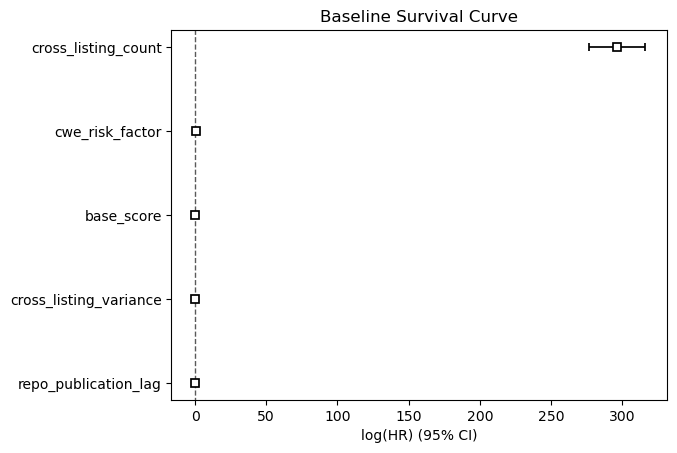

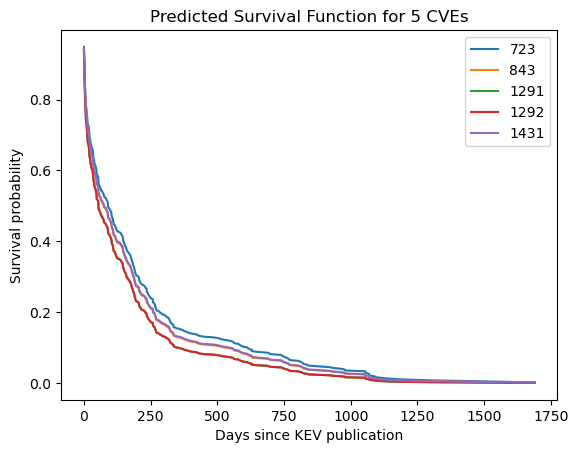

Concordance index: 0.528

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 584 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic      p  -log2(p)
base_score             km              0.04   0.85      0.24
                       rank            0.04   0.84      0.26
cross_listing_count    km            249.36 <0.005    184.18
                       rank          272.90 <0.005    201.23
cross_listing_variance km              0.13   0.72      0.47
                       rank            0.12   0.72      0.46
cwe_risk_factor        km              0.15   0.70      0.51
                       rank            0.19   0.67      0.59
repo_publication_lag   km              0.21   0.65      0.63
                       rank            0.21   0.65      0.63



1. Variable 'cross_listing_count' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'cross_listing_count' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'cross_listing_count' using pd.cut, and then specify it in
`strata=['cross_listing_count', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20as

[[<Axes: xlabel='rank-transformed time\n(p=0.8369)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8478)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6462)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6457)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.7248)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7207)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6666)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6999)'>]]

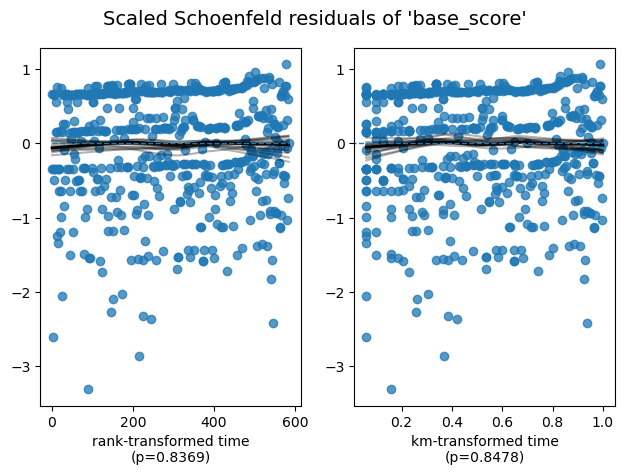

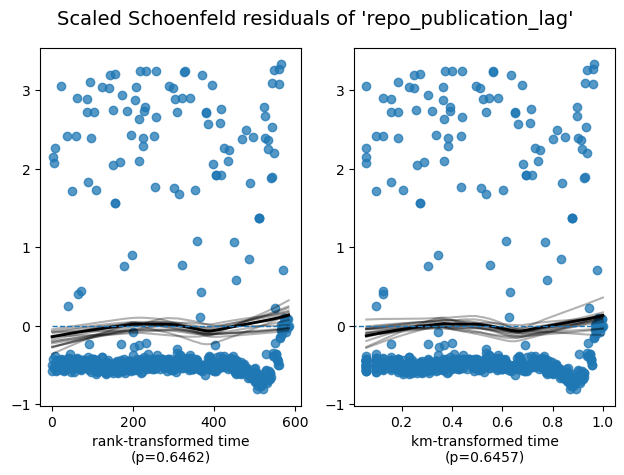

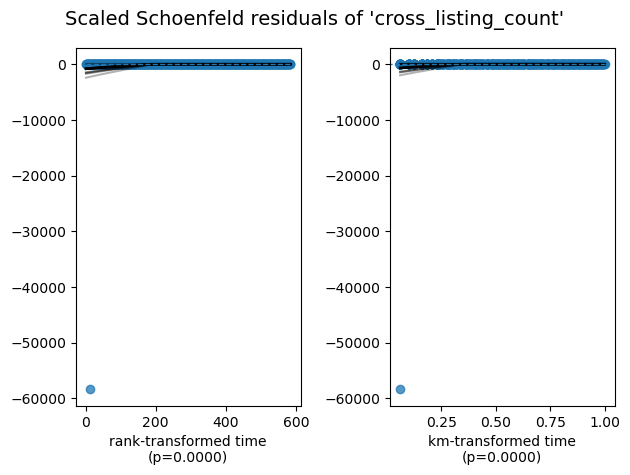

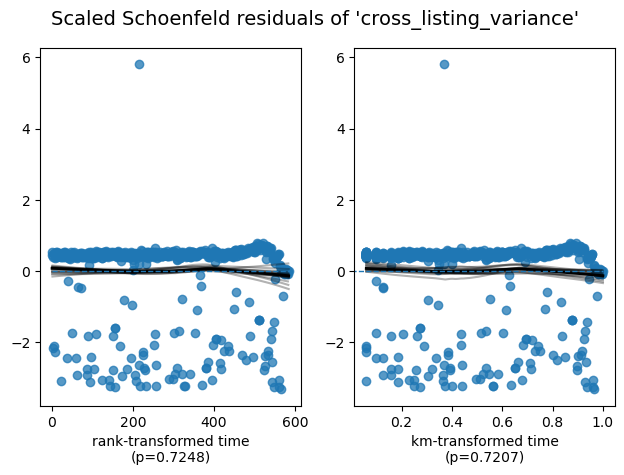

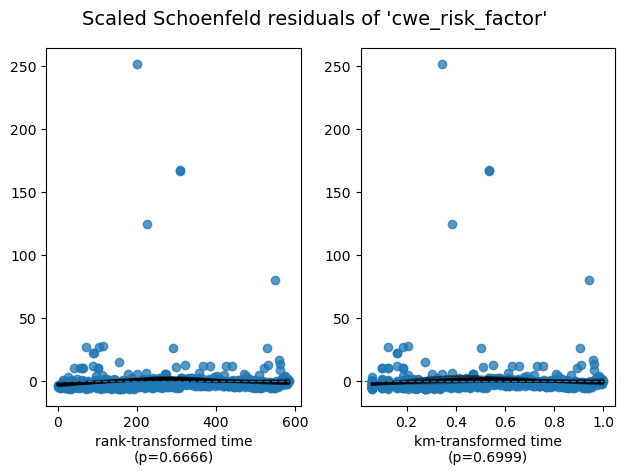

In [3]:
# --- Step 1: Define your features ---
features = ['base_score', 'repo_publication_lag', 'cross_listing_count',
            'cross_listing_variance', 'cwe_risk_factor']

# --- Step 2: Handle missing or invalid data ---
# Replace negative time_to_exploit with NaN
df.loc[df['time_to_exploit'] < 0, 'time_to_exploit'] = pd.NA

# Fill NaNs in features with median
df[features] = df[features].fillna(df[features].median())

# Drop rows with missing duration or event
df_clean = df.dropna(subset=['time_to_exploit', 'event'])

# --- Step 3: Fit Cox Proportional Hazards model ---
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_clean[features + ['time_to_exploit', 'event']],
        duration_col='time_to_exploit',
        event_col='event')

# Print summary
cph.print_summary()

# --- Step 4: Predict risk scores ---
df_clean = df_clean.copy()  # make a proper copy
df_clean['risk_score'] = cph.predict_partial_hazard(df_clean[features])


# Optional: top 5 CVEs by predicted risk
print(df_clean[['risk_score'] + features].sort_values(by='risk_score', ascending=False).head())

# --- Step 5: Plot baseline survival curve ---
cph.plot()
plt.title("Baseline Survival Curve")
plt.show()

# --- Step 6: Plot predicted survival function for first 5 CVEs ---
cph.predict_survival_function(df_clean[features].iloc[:5]).plot()
plt.title("Predicted Survival Function for 5 CVEs")
plt.xlabel("Days since KEV publication")
plt.ylabel("Survival probability")
plt.show()

c_index = cph.concordance_index_
print(f"Concordance index: {c_index:.3f}")

cph.check_assumptions(df_clean[features + ['time_to_exploit', 'event']], p_value_threshold=0.05,show_plots = True)


## Model fixing cross_listing_count

C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\838010677.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cross_listing_bin'] = pd.qcut(df_clean['cross_listing_count'], q=4, duplicates='drop')
c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\__init__.py:1280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, df_ in df.groupby(strata):
c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version 

model,lifelines.CoxPHFitter
duration col,'time_to_exploit'
event col,'event'
penalizer,0.01
l1 ratio,0.0
strata,cross_listing_bin
baseline estimation,breslow
number of observations,584
number of events observed,584
partial log-likelihood,-3137.97
time fit was run,2025-11-06 20:29:31 UTC


        risk_score  base_score  repo_publication_lag  cross_listing_variance  \
132069    1.845721         9.8             71.207420                    71.0   
126612    1.783862         9.8              0.021899                     0.0   
65640     1.504103         9.8              0.039738                     0.0   
44935     1.188622         8.6              0.044850                     0.0   
65639     1.178989         5.3              0.039853                     0.0   

        cwe_risk_factor  
132069         0.027251  
126612         1.000000  
65640          0.666667  
44935          0.333333  
65639          0.666667  


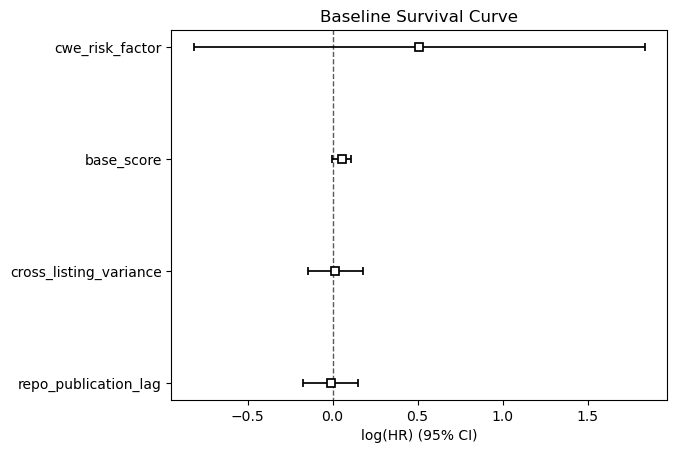

c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:2339: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):


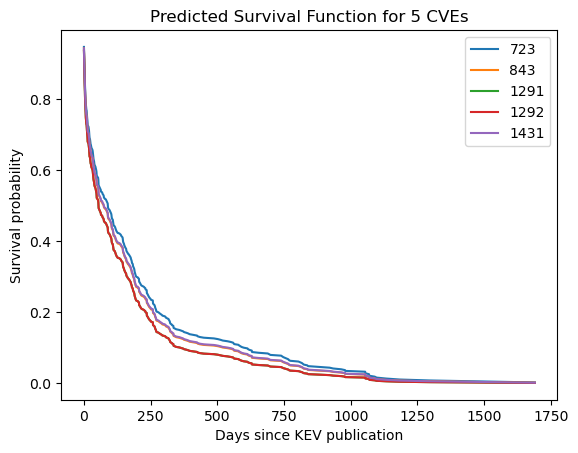

Concordance index: 0.529

   Bootstrapping lowess lines. May take a moment...



c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.8400)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8508)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6468)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6465)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.7158)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7112)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6972)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7318)'>]]

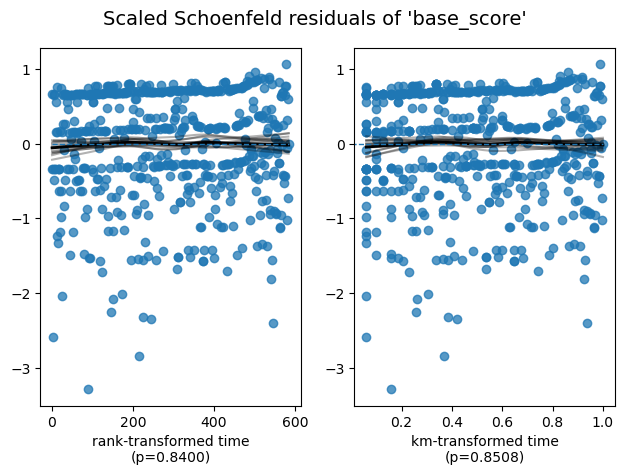

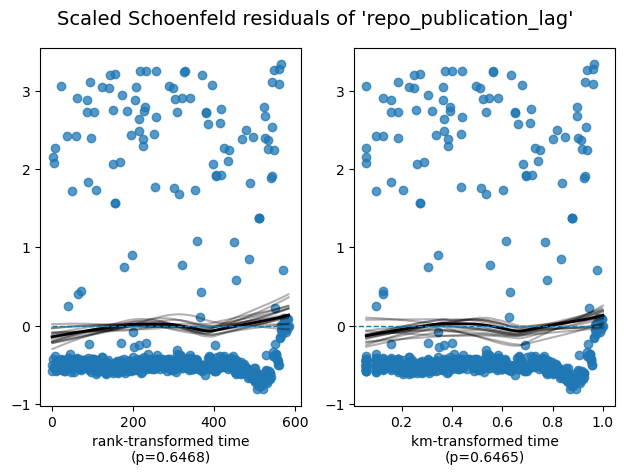

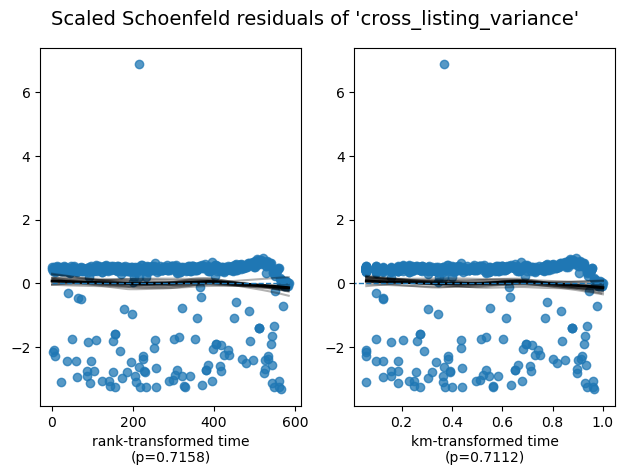

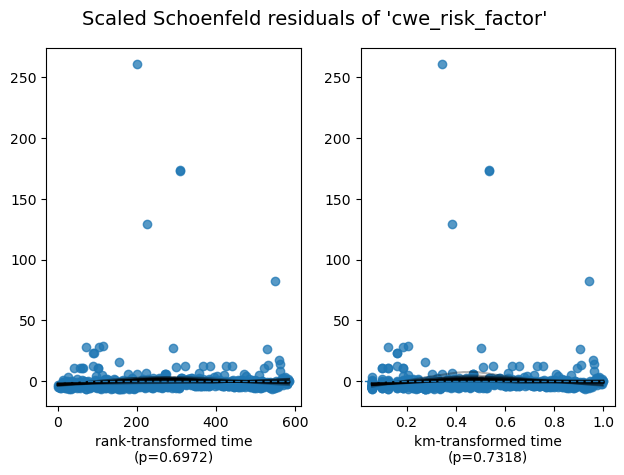

In [4]:
# --- Step 1: Calculate time-to-event and event indicator ---
df['time_to_exploit'] = (df['kev_published'] - df['published_date']).dt.days
df['event'] = df['kev_published'].notna().astype(int)

# --- Step 2: Define features ---
features = ['base_score', 'repo_publication_lag', 
            'cross_listing_variance', 'cwe_risk_factor']

# --- Step 3: Handle missing/invalid data ---
# Replace negative time_to_exploit with NaN
df.loc[df['time_to_exploit'] < 0, 'time_to_exploit'] = pd.NA

# Fill NaNs in features with median
df[features] = df[features].fillna(df[features].median())

# Drop rows with missing duration or event
df_clean = df.dropna(subset=['time_to_exploit', 'event'])

# --- Step 4: Bin cross_listing_count for stratification ---
# Example: 4 bins (quartiles)
df_clean['cross_listing_bin'] = pd.qcut(df_clean['cross_listing_count'], q=4, duplicates='drop')

# --- Step 5: Fit Cox PH model with stratification ---
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_clean[features + ['time_to_exploit', 'event','cross_listing_bin']],
        duration_col='time_to_exploit',
        event_col='event',
        strata=['cross_listing_bin'])  # stratify on the binned variable

# --- Step 6: Print summary ---
cph.print_summary()

# --- Step 4: Predict risk scores ---
df_clean = df_clean.copy()  # make a proper copy
df_clean['risk_score'] = cph.predict_partial_hazard(df_clean[features])


# Optional: top 5 CVEs by predicted risk
print(df_clean[['risk_score'] + features].sort_values(by='risk_score', ascending=False).head())

# --- Step 5: Plot baseline survival curve ---
cph.plot()
plt.title("Baseline Survival Curve")
plt.show()

# --- Step 6: Plot predicted survival function for first 5 CVEs ---
df_pred = df_clean[features + ['cross_listing_bin']].iloc[:5]

cph.predict_survival_function(df_pred).plot()
plt.title("Predicted Survival Function for 5 CVEs")
plt.xlabel("Days since KEV publication")
plt.ylabel("Survival probability")
plt.show()

c_index = cph.concordance_index_
print(f"Concordance index: {c_index:.3f}")

cph.check_assumptions(df_clean[features + ['time_to_exploit', 'event','cross_listing_bin']], p_value_threshold=0.05,show_plots = True)


## Model Adding in Interaction

C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\1382538262.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cross_listing_bin'] = pd.qcut(df_clean['cross_listing_count'], q=4, duplicates='drop')
C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\1382538262.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['base_score_x_time'] = df_clean['base_score'] * df_clean['time_to_exploit']
C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\1382538262.py:24: SettingWithCopyWarning: 
A value is t

model,lifelines.CoxPHFitter
duration col,'time_to_exploit'
event col,'event'
penalizer,0.01
l1 ratio,0.0
strata,cross_listing_bin
baseline estimation,breslow
number of observations,584
number of events observed,584
partial log-likelihood,-2612.16
time fit was run,2025-11-06 20:29:36 UTC


C:\Users\jvgat\AppData\Local\Temp\ipykernel_2264\1382538262.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['risk_score'] = cph.predict_partial_hazard(df_clean[model_features])


        risk_score  repo_publication_lag  cross_listing_variance  \
106306   11.722375              0.927115                     0.0   
67322    11.569121              0.719258                     0.0   
57249    11.538338              0.677174                     0.0   
58156    11.538336              0.677172                     0.0   
27838    11.439810              0.760573                     0.0   

        base_score_x_time  cwe_risk_factor_x_time  
106306                0.0                0.000000  
67322                 0.0                0.000000  
57249                 0.0                0.000000  
58156                 0.0                0.000000  
27838                 7.8                0.001661  


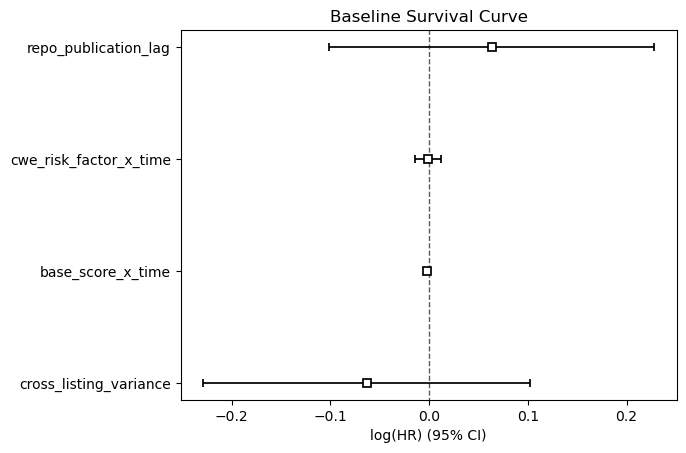

c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:2339: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):


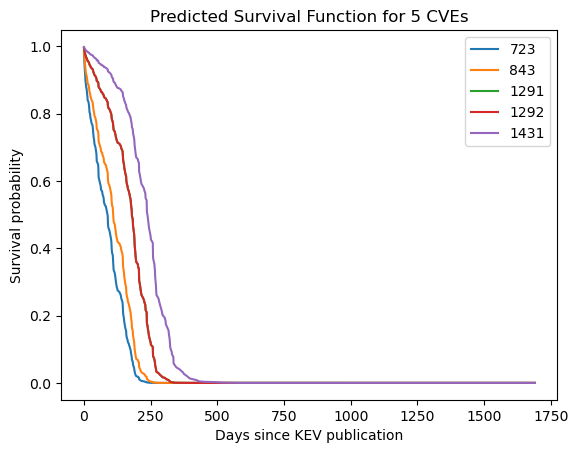

c:\Users\jvgat\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 584 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic      p  -log2(p)
base_score_x_time      km            250.26 <0.005    184.84
                       rank          245.01 <0.005    181.04
cross_listing_variance km              1.02   0.31      1.68
                       rank            1.01   0.31      1.67
cwe_risk_factor_x_time km              2.74   0.10      3.35
                       rank            2.73   0.10      3.35
repo_publication_lag   km              1.25   0.26      1.92
                       rank            1.24   0.26      1.92



1. Variable 'base_score_x_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'base_score_x_time' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'base_score_x_time' using pd.cut, and then specify it in
`strata=['base_score_x_time', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lif

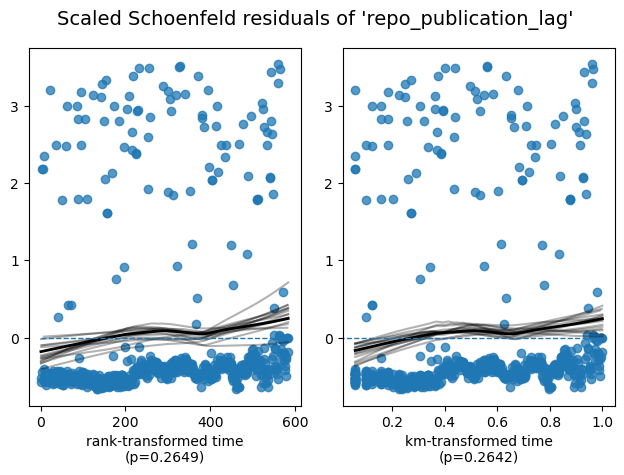

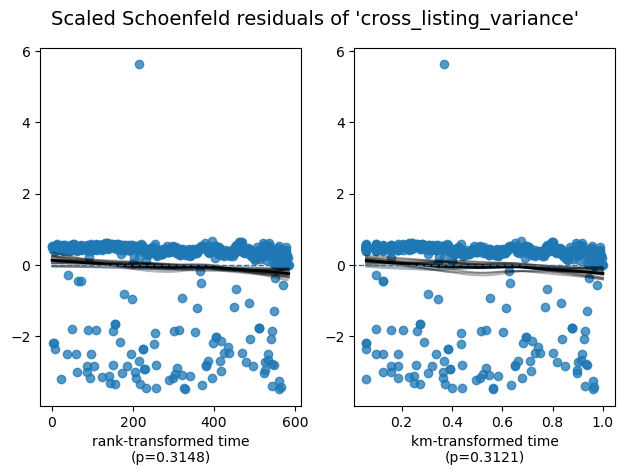

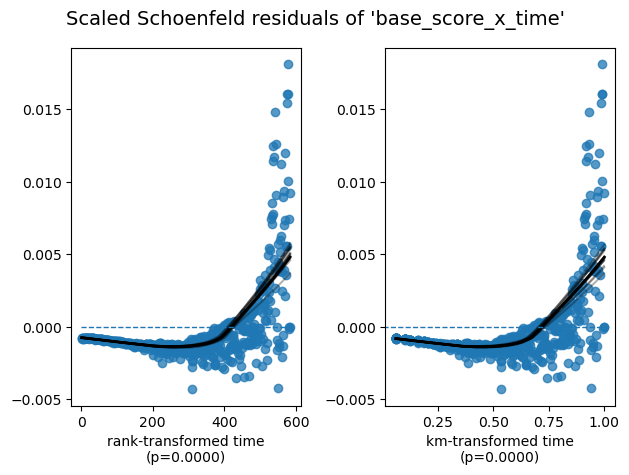

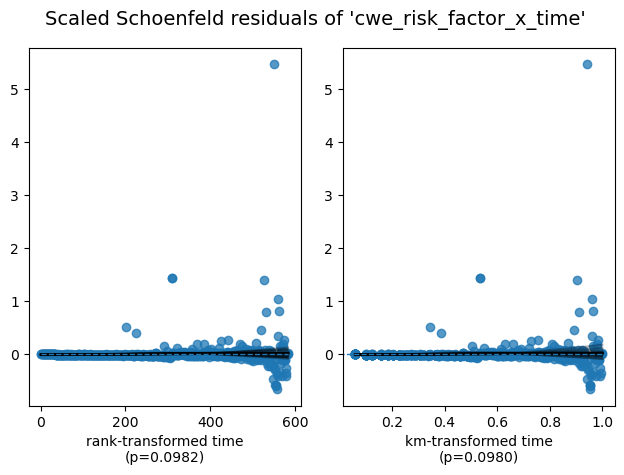

In [5]:
# --- Step 1: Calculate time-to-event and event indicator ---
df['time_to_exploit'] = (df['kev_published'] - df['published_date']).dt.days
df['event'] = df['kev_published'].notna().astype(int)

# --- Step 2: Define features ---
features = ['base_score', 'repo_publication_lag', 
            'cross_listing_variance', 'cwe_risk_factor']

# --- Step 3: Handle missing/invalid data ---
# Replace negative time_to_exploit with NaN
df.loc[df['time_to_exploit'] < 0, 'time_to_exploit'] = pd.NA

# Fill NaNs in features with median
df[features] = df[features].fillna(df[features].median())

# Drop rows with missing duration or event
df_clean = df.dropna(subset=['time_to_exploit', 'event'])

# --- Step 4: Bin cross_listing_count for stratification ---
df_clean['cross_listing_bin'] = pd.qcut(df_clean['cross_listing_count'], q=4, duplicates='drop')

# --- Step 5: Add time interactions for PH-violating variables ---
df_clean['base_score_x_time'] = df_clean['base_score'] * df_clean['time_to_exploit']
df_clean['cwe_risk_factor_x_time'] = df_clean['cwe_risk_factor'] * df_clean['time_to_exploit']

# --- Step 6: Fit Cox PH model ---
# Features include normal covariates + time interactions
model_features = ['repo_publication_lag', 'cross_listing_variance', 
                  'base_score_x_time', 'cwe_risk_factor_x_time']

# Stratify only on cross_listing_bin
cph = CoxPHFitter(penalizer=0.01)
cph.fit(
    df_clean[model_features + ['time_to_exploit', 'event', 'cross_listing_bin']],
    duration_col='time_to_exploit',
    event_col='event',
    strata=['cross_listing_bin']
)

# --- Step 7: Print model summary ---
cph.print_summary()

# --- Step 8: Predict risk scores ---
df_clean['risk_score'] = cph.predict_partial_hazard(df_clean[model_features])

# Optional: top 5 CVEs by predicted risk
print(df_clean[['risk_score'] + model_features].sort_values(by='risk_score', ascending=False).head())

# --- Step 9: Plot baseline survival curve ---
cph.plot()
plt.title("Baseline Survival Curve")
plt.show()

# --- Step 10: Plot predicted survival function for first 5 CVEs ---
df_pred = df_clean[model_features + ['cross_listing_bin']].iloc[:5]
cph.predict_survival_function(df_pred).plot()
plt.title("Predicted Survival Function for 5 CVEs")
plt.xlabel("Days since KEV publication")
plt.ylabel("Survival probability")
plt.show()

# --- Step 11: Check proportional hazards assumption ---
cph.check_assumptions(
    df_clean[model_features + ['time_to_exploit', 'event', 'cross_listing_bin']],
    p_value_threshold=0.05,
    show_plots=True
)

c_index = cph.concordance_index_
print(f"Concordance index: {c_index:.3f}")